<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/KNN/K_Nearest_Neighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
try:
    !rm -rf AprendizMaquina
except:
    print("No existe la ruta aún")



!git clone 'https://github.com/pikey-msc/AprendizMaquina'


Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 222 (delta 36), reused 130 (delta 28), pack-reused 66
Receiving objects: 100% (222/222), 11.98 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [5]:
pd.read_csv("/content/AprendizMaquina/2023-1/KNN/Datos/Classified_Data")

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [6]:
df = pd.read_csv("/content/AprendizMaquina/2023-1/KNN/Datos/Classified_Data",index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X=df[[x for x in df.columns if x != 'TARGET CLASS']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,df['TARGET CLASS'],
                                                    test_size=0.30)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[142  22]
 [ 11 125]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       164
           1       0.85      0.92      0.88       136

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

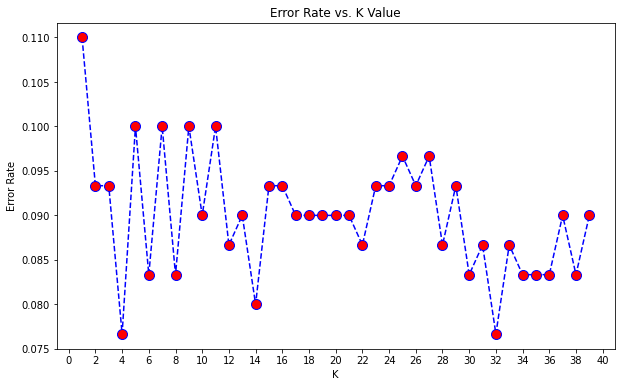

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(np.arange(0, 42, 2));

In [ ]:

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(' K=4')
print('Train')
print(classification_report(y_train,knn.predict(X_train)))


print('\n')
print('Test')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

 K=4
Train
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       336
           1       0.98      0.96      0.97       364

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700



Test
[[149  15]
 [  8 128]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       164
           1       0.90      0.94      0.92       136

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

